### 模型架構

 <img src="HW9.png" alt="drawing" style="width: 900px; height: 500px"/>

### Loss function : categorical_crossentropy

### Optimizer : Adam

In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [36]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam

### 由Keras 讀入 MNIST

In [3]:
from keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [6]:
x_train[1234].shape

(28, 28)

#### 一張圖可能會有三種矩陣(channel,RGB三原色)
#### 目前的圖片是灰階 channel只有一個
#### 正確的CNN shape (28,28,1)

In [7]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [8]:
#看一下剛剛的1234

x_train[1234].shape

(28, 28, 1)

In [9]:
#要畫出原本的矩陣

X = x_train[1234]

In [12]:
X = X.reshape(28,28)

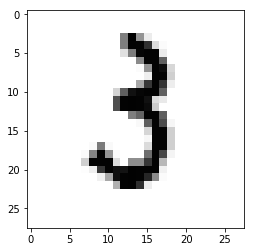

In [13]:
plt.imshow(X,cmap="Greys")

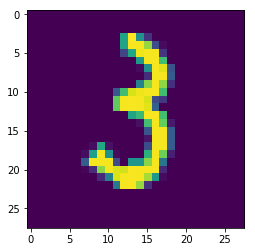

In [14]:
plt.imshow(X)

#### y改成 one-hot

In [16]:
y_train[1234]

3

In [17]:
from keras.utils import np_utils

In [18]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [20]:
y_train[1234]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### 將x的數據標準化為0~1 (原本為0~255)

In [21]:
x_train = x_train/255
x_test = x_test/255

#### 設計CNN~~

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras.optimizers import SGD

#### 一開始一樣打開空白機

In [132]:
model = Sequential()

### 第一次Conv

#### same : 外面幾層0是filter size決定，使出來的還是28X28

In [133]:
model.add(Conv2D(4,(5,5),padding="same",input_shape=(28,28,1)))
model.add(Activation("elu"))

#### Max-pooling

In [134]:
model.add(MaxPool2D(pool_size=(2,2)))

### 第二次Conv

In [135]:
model.add(Conv2D(8,(5,5),padding="same"))
model.add(Activation("elu"))

In [136]:
model.add(MaxPool2D(pool_size=(2,2)))

### 第三次Conv

In [137]:
model.add(Conv2D(16,(5,5),padding="same"))
model.add(Activation("elu"))

In [138]:
model.add(MaxPool2D(pool_size=(2,2)))

### 第四次Conv

In [139]:
model.add(Conv2D(32,(5,5),padding="same"))
model.add(Activation("elu"))

In [140]:
model.add(MaxPool2D(pool_size=(2,2)))

#### 送進一層的fully connected

In [141]:
model.add(Flatten())
model.add(Dense(9))
model.add(Activation("relu"))

#### 輸出!

In [142]:
model.add(Dense(10))
model.add(Activation("softmax"))
#softmax 使加起來變成1

#### 組裝

In [143]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

#### 檢視
    
    參數量運算範例
    
    Conv1:  
        4個 filter，大小5X5，共有25個weight
        共有 25X4 = 100，再加4個bias

In [144]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 4)         104       
_________________________________________________________________
activation_45 (Activation)   (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 8)         808       
_________________________________________________________________
activation_46 (Activation)   (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 7, 7, 16)          3216      
__________

#### 訓練

In [145]:
model_1 = model.fit(x_train,y_train,batch_size=100,epochs=10,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 470us/step - loss: 0.5441 - acc: 0.8206 - val_loss: 0.1692 - val_acc: 0.9514
Epoch 2/10
60000/60000 [==============================] - 28s 467us/step - loss: 0.1347 - acc: 0.9604 - val_loss: 0.0982 - val_acc: 0.9701
Epoch 3/10
60000/60000 [==============================] - 28s 460us/step - loss: 0.0900 - acc: 0.9730 - val_loss: 0.0848 - val_acc: 0.9751
Epoch 4/10
60000/60000 [==============================] - 28s 468us/step - loss: 0.0697 - acc: 0.9790 - val_loss: 0.0738 - val_acc: 0.9763
Epoch 5/10
60000/60000 [==============================] - 30s 502us/step - loss: 0.0561 - acc: 0.9826 - val_loss: 0.0611 - val_acc: 0.9820
Epoch 6/10
60000/60000 [==============================] - 30s 494us/step - loss: 0.0477 - acc: 0.9855 - val_loss: 0.0574 - val_acc: 0.9839
Epoch 7/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.0421 - acc: 0.9869 - val_loss: 0.

#### 如果沒做normalization : accuracy 可能會為0.1

### Training data accuracy plot

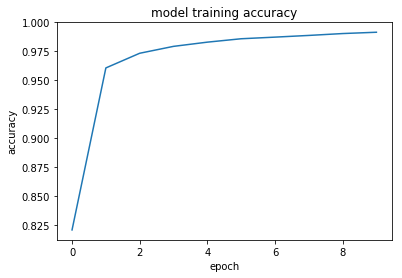

In [147]:
plt.plot(model_1.history["acc"])
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

### Testing data accuracy plot

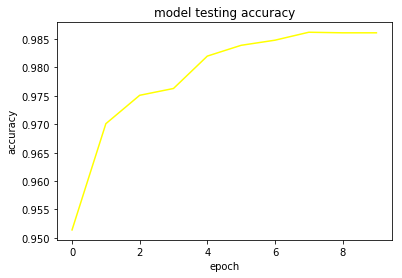

In [148]:
plt.plot(model_1.history["val_acc"],color="yellow")
plt.title("model testing accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

### Testing data 預測表現

In [146]:
score = model.evaluate(x_test, y_test, batch_size=100)
print("Loss: %f" %score[0])
print("準確率: %f" %(score[1]*100))

10000/10000 [==============================] - 2s 178us/step
Loss: 0.048239
準確率: 98.610001


### 結論

    在其他參數不變下，加到第四層時 Training data 的 Accuracy 其實已經達到 97%。而將 Optimizer 換成 Adam 則上升至 98%，而將 loss function 改成 categorical_crossentropy 則上升至 99%。最終 Testing data 的 Accuracy 為 98.61%。